- Camera: 60M pixel back-illuminated CMOS camera (9,576 x 6,388 pixels)
- Field of view: 1.375 deg x 0.915 deg (1.26 deg^2)

In [374]:
# Python Library
import os, glob, sys
import matplotlib.pyplot as plt
from astropy import units as u
import numpy as np
from astropy.table import Table, vstack
import warnings
warnings.filterwarnings("ignore")

# Plot presetting
import matplotlib.pyplot as plt
import matplotlib as mpl
#
mpl.rcParams["axes.titlesize"] = 14
mpl.rcParams["axes.labelsize"] = 20
plt.rcParams['savefig.dpi'] = 500
plt.rc('font', family='serif')

In [375]:
from astroquery.simbad import Simbad

def get_ra_dec(object_name):
    result_table = Simbad.query_object(object_name)
    ra = result_table['RA'].data[0]  # RA in h:m:s format
    dec = result_table['DEC'].data[0]  # DEC in d:m:s format
    
    # RA, Dec을 degree로 변환하려면 astropy.coordinates를 사용할 수 있습니다.
    from astropy.coordinates import SkyCoord
    import astropy.units as u

    c = SkyCoord(ra=ra, dec=dec, unit=(u.hourangle, u.deg))
    ra_deg = c.ra.deg
    dec_deg = c.dec.deg
    
    # print(f"RA (degree): {ra_deg}, Dec (degree): {dec_deg}")
    return ra_deg, dec_deg

# 예시 사용법
# get_ra_dec("NGC0253")

In [376]:
nx, ny = 9576, 6388
pixscale = 0.51
#	7DT FoV
_rasize = nx*pixscale/3600
_decsize = ny*pixscale/3600
#	Wider FoV to query
rasize = 1.5*nx*pixscale/3600
decsize = 1.5*ny*pixscale/3600

print(f"Pixel Size     : {nx}x{ny}")
print(f"Pixel Scale    : {pixscale} arcsec/pixel")
print(f"RA, Dec (7DT)  : {_rasize:.3f} x {_decsize:.3f} deg^2")
print(f"RA, Dec (Query): {rasize:.3f} x {decsize:.3f} deg^2")

Pixel Size     : 9576x6388
Pixel Scale    : 0.51 arcsec/pixel
RA, Dec (7DT)  : 1.357 x 0.905 deg^2
RA, Dec (Query): 2.035 x 1.357 deg^2


In [377]:
try:
	len(intbl)
except:
	intbl = Table.read('../data/gpaek_gaiaxp_zpcat_light.fits')

In [378]:
################################################################
# tname = 'LTT7987'
# tra, tdec = 302.737, -30.219 # [deg], [deg]
# radius = 1.0 # [deg]
################################################################
# tname = 'NGC0253'
# tra, tdec = 11.8875, -24.7111 # [deg], [deg]
# radius = 1.5 # [deg]
################################################################
# tname = 'LTT1020'
# tra, tdec = 28.709, -27.477 # [deg], [deg]
# radius = 1.5 # [deg]
################################################################
# tname = 'FEIGE110'
# tra, tdec = 350.002, -5.191 # [deg], [deg]
# radius = 1.5 # [deg]
################################################################
# tname = 'NGC0253'
# tname = 'NGC7293'
# tname = 'LTT1020'
# tname = 'NGC1097'
# tname = 'NGC6514'
# tname = 'NGC7469'
# tname = 'NGC1566'
# tname = 'NGC1980'
# tname = 'NGC1990'
tname = 'LTT7987'
# tname = 'LTT9491'

radius = 1.5 # [deg]
tra, tdec = get_ra_dec(tname)

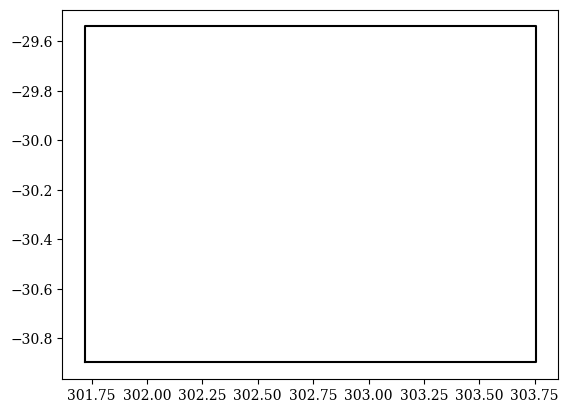

In [379]:
ra0 = tra-rasize/2,
ra1 = tra+rasize/2,

dec0 = tdec-decsize/2,
dec1 = tdec+decsize/2,

ralist = [
	ra0,
	ra1,
	ra1,
	ra0,
	ra0,
]

declist = [
	dec0,
	dec0,
    dec1,
    dec1,
    dec0,
]

plt.plot(ralist, declist, 'k-')

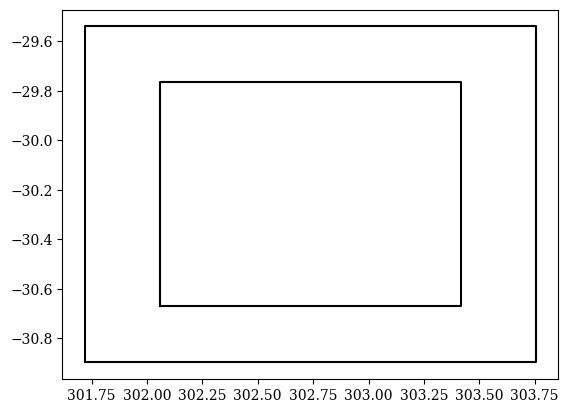

In [380]:
_ra0 = tra-_rasize/2,
_ra1 = tra+_rasize/2,

_dec0 = tdec-_decsize/2,
_dec1 = tdec+_decsize/2,

_ralist = [
	_ra0,
	_ra1,
	_ra1,
	_ra0,
	_ra0,
]

_declist = [
	_dec0,
	_dec0,
    _dec1,
    _dec1,
    _dec0,
]

plt.plot(ralist, declist, 'k-')
plt.plot(_ralist, _declist, 'k-')

In [381]:
indx_select = np.where(
	(intbl['ra'] > tra-radius) & (intbl['ra'] < tra+radius) &
	(intbl['dec'] > tdec-radius) & (intbl['dec'] < tdec+radius)
)

seltbl = intbl[indx_select]
print(len(intbl[indx_select]))

10918


In [382]:
indx_fov = np.where(
	(seltbl['ra'] > np.min(ralist)) & (seltbl['ra'] < np.max(ralist)) &
	(seltbl['dec'] > np.min(declist)) & (seltbl['dec'] < np.max(declist))
)

fovtbl = seltbl[indx_fov]

In [383]:
fovtbl

source_id,skymapper_mag_u,skymapper_mag_u2,skymapper_mag_v,skymapper_mag_g,skymapper_mag_r,skymapper_mag_i,skymapper_mag_z,ra,dec,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,cflag_u,cflag_u2,cflag_v,cflag_g,cflag_r,cflag_i,cflag_z,ebmv_sfd,ebpminrp_gspphot
int64,float32,float32,float32,float32,float32,float32,float32,float64,float64,float32,float32,float32,float32,bool,bool,bool,bool,bool,bool,bool,float32,float32
6748919336136893440,17.34375,17.265625,17.046875,15.7734375,15.3828125,15.1328125,15.046875,301.727015850192,-30.8937387391109,15.3828125,15.796875,14.796875,1.0048828,False,False,False,True,True,True,True,0.14672852,0.0073013306
6748919370496631168,18.828125,18.640625,18.546875,16.59375,16.0625,15.7109375,15.53125,301.73800961932,-30.8949052111656,16.0625,16.59375,15.375,1.2216797,False,False,False,False,False,True,True,0.14672852,0.13623047
6748919370496631424,16.15625,16.0625,15.7421875,14.671875,14.3671875,14.1953125,14.1484375,301.740164996725,-30.891005476974,14.3671875,14.7109375,13.8515625,0.85546875,False,False,True,True,True,True,True,0.14672852,0.18444824
6748919507935582976,14.2265625,14.125,14.1484375,12.4453125,11.9765625,11.6875,11.578125,301.78946719721,-30.8828698804528,11.984375,12.4609375,11.34375,1.1142578,True,True,True,True,True,True,True,0.14672852,0.05899048
6748907825624536704,19.0,18.984375,20.671875,17.25,16.40625,15.7421875,15.4609375,301.832127961473,-30.886267664362,16.3125,17.140625,15.421875,1.7265625,False,False,False,False,False,True,True,0.14672852,0.24353027
6749283240125262720,18.046875,17.9375,17.703125,16.390625,15.984375,15.7109375,15.6015625,301.839240555673,-30.855605868106,15.984375,16.421875,15.375,1.0527344,False,False,False,False,True,True,True,0.15454102,0.15808105
6749282308114954496,14.7265625,14.6171875,14.5390625,12.921875,12.40625,12.0390625,11.8671875,301.945517268689,-30.8943481804272,12.390625,12.9296875,11.6953125,1.2285156,True,True,True,True,True,True,True,0.15270996,0.40771484
6749279494913737216,20.0,20.0,21.328125,18.25,17.25,16.234375,15.8359375,301.972528589303,-30.8885583154334,16.96875,18.03125,15.9375,2.0976562,False,False,False,False,False,False,True,0.15270996,0.28833008
6749279460553994496,16.28125,16.1875,15.9921875,14.75,14.3671875,14.140625,14.0546875,302.001313553915,-30.8812098038744,14.375,14.78125,13.796875,0.9838867,False,False,True,True,True,True,True,0.15270996,0.061187744


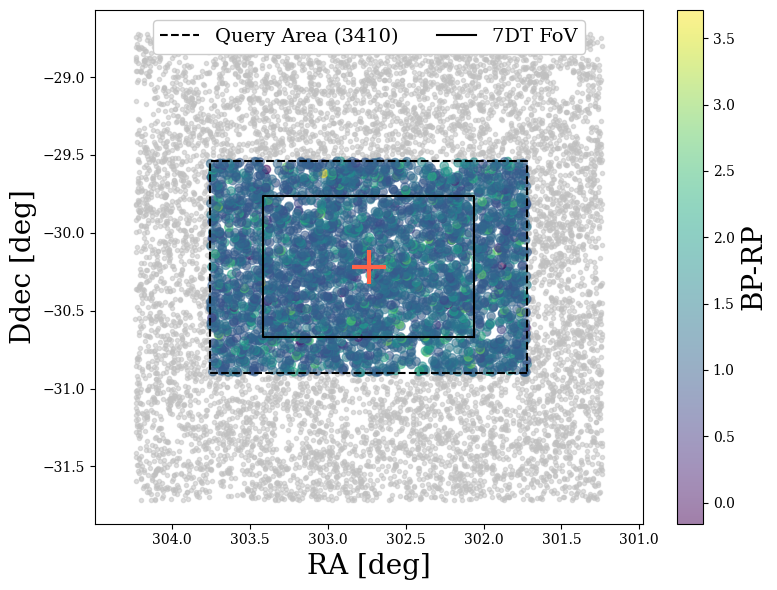

In [384]:
fig = plt.figure(figsize=(8, 6))

plt.scatter(seltbl['ra'], seltbl['dec'], marker='.', c='silver', alpha=0.5)
plt.scatter(fovtbl['ra'], fovtbl['dec'], marker='o', c=fovtbl['bp_rp'], alpha=0.5)
plt.plot(tra, tdec, marker='+', ms=25, mew=3, c='tomato',  ls='none', zorder=9999)
# FOV
plt.plot(ralist, declist, 'k--', label=f'Query Area ({len(fovtbl)})')
plt.plot(_ralist, _declist, 'k-', label=f'7DT FoV')

cbar = plt.colorbar()
cbar.set_label(r'BP-RP')

xl, xr = plt.xlim()
plt.xlim([xr, xl])
plt.xlabel('RA [deg]')
plt.ylabel('Ddec [deg]')
plt.axis('equal')
plt.legend(loc='upper center', ncol=2, fontsize=14, framealpha=1.0)
plt.tight_layout()
plt.savefig(f'../output/{tname}.png')

In [385]:
fovtbl.write(f'../output/{tname}.pre.csv', format='csv', overwrite=True)

In [386]:
f = open(f'../output/{tname}.txt', 'w')
for ra, dec in zip(fovtbl['ra'], fovtbl['dec']):
	# print(ra, dec)
	line = f"{ra} {dec}\n"
	f.write(line)
f.close()